# Data Analysis using SQL

In [1]:
import sqlite3
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
database = sqlite3.connect("./data/database.sqlite")

cursor = database.cursor()

cursor.execute("SELECT name FROM sqlite_schema WHERE type ='table' AND name NOT LIKE 'sqlite_%';")
cursor.fetchall()

[('Player_Attributes',),
 ('Player',),
 ('Match',),
 ('League',),
 ('Country',),
 ('Team',),
 ('Team_Attributes',)]

In [5]:
tables = pd.read_sql(""" 
SELECT * FROM sqlite_master
WHERE type = 'table' 
                    
""", database)
tables

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,4,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,Player_Attributes,Player_Attributes,11,"CREATE TABLE ""Player_Attributes"" (\n\t`id`\tIN..."
2,table,Player,Player,14,CREATE TABLE `Player` (\n\t`id`\tINTEGER PRIMA...
3,table,Match,Match,18,CREATE TABLE `Match` (\n\t`id`\tINTEGER PRIMAR...
4,table,League,League,24,CREATE TABLE `League` (\n\t`id`\tINTEGER PRIMA...
5,table,Country,Country,26,CREATE TABLE `Country` (\n\t`id`\tINTEGER PRIM...
6,table,Team,Team,29,"CREATE TABLE ""Team"" (\n\t`id`\tINTEGER PRIMARY..."
7,table,Team_Attributes,Team_Attributes,2,CREATE TABLE `Team_Attributes` (\n\t`id`\tINTE...


In [6]:
countries = pd.read_sql("SELECT * FROM country" , database)
countries.head()

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy


In [7]:
leagues = pd.read_sql("SELECT * FROM League" , database)
leagues.head()

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A


In [12]:
leagues_per_country = pd.read_sql("""
        SELECT League.country_id, League.name, country.name as country_name
        FROM League INNER JOIN Country
        ON Country.id = League.country_id	
        ORDER BY country.name 
""" , database)

leagues_per_country.head(10)

,country_id,name,country_name
0,1,Belgium Jupiler League,Belgium
1,1729,England Premier League,England
2,4769,France Ligue 1,France
3,7809,Germany 1. Bundesliga,Germany
4,10257,Italy Serie A,Italy
5,13274,Netherlands Eredivisie,Netherlands
6,15722,Poland Ekstraklasa,Poland
7,17642,Portugal Liga ZON Sagres,Portugal
8,19694,Scotland Premier League,Scotland
9,21518,Spain LIGA BBVA,Spain


In [13]:
leagues_per_country = pd.read_sql("""
        SELECT COUNT(League.name) as number_of_leagues , country.name as country_name
        FROM League INNER JOIN Country
        ON Country.id = League.country_id	
        GROUP BY country.name
        ORDER BY COUNT(League.name) DESC 
""" , database)

leagues_per_country.head(10)

,number_of_leagues,country_name
0,1,Switzerland
1,1,Spain
2,1,Scotland
3,1,Portugal
4,1,Poland
5,1,Netherlands
6,1,Italy
7,1,Germany
8,1,France
9,1,England


In [14]:
teams = pd.read_sql("""
        SELECT * FROM Team
        ORDER BY team_long_name
        LIMIT 10 
""" , database)

teams

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,16848,8350,29,1. FC Kaiserslautern,KAI
1,15624,8722,31,1. FC Köln,FCK
2,16239,8165,171,1. FC Nürnberg,NUR
3,16243,9905,169,1. FSV Mainz 05,MAI
4,11817,8576,614,AC Ajaccio,AJA
5,11074,108893,111989,AC Arles-Avignon,ARL
6,49116,6493,1714,AC Bellinzona,BEL
7,26560,10217,650,ADO Den Haag,HAA
8,9537,8583,57,AJ Auxerre,AUX
9,9547,9829,69,AS Monaco,MON


In [15]:
spain_detailed_matches = pd.read_sql("""
                                SELECT Match.id, 
                                Country.name AS country_name, 
                                League.name AS league_name, 
                                season, 
                                stage, 
                                date,
                                HT.team_long_name AS  home_team,
                                AT.team_long_name AS away_team,
                                home_team_goal, 
                                away_team_goal                                        
                                FROM Match
                                JOIN Country on Country.id = Match.country_id
                                JOIN League on League.id = Match.league_id
                                LEFT JOIN Team AS HT on HT.team_api_id = Match.home_team_api_id
                                LEFT JOIN Team AS AT on AT.team_api_id = Match.away_team_api_id
                                WHERE country_name = 'Spain'
                                ORDER by date
                                LIMIT 10""" ,database)

spain_detailed_matches

,id,country_name,league_name,season,stage,date,home_team,away_team,home_team_goal,away_team_goal
0,21518,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-30 00:00:00,Valencia CF,RCD Mallorca,3,0
1,21525,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-30 00:00:00,RCD Espanyol,Real Valladolid,1,0
2,21519,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,CA Osasuna,Villarreal CF,1,1
3,21520,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,RC Deportivo de La Coruña,Real Madrid CF,2,1
4,21521,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,CD Numancia,FC Barcelona,1,0
5,21522,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,Racing Santander,Sevilla FC,1,1
6,21523,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,Real Sporting de Gijón,Getafe CF,1,2
7,21524,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,Real Betis Balompié,RC Recreativo,0,1
8,21526,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,Athletic Club de Bilbao,UD Almería,1,3
9,21527,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,Atlético Madrid,Málaga CF,4,0


In [18]:
tmp = pd.read_sql(
    """ 
    SELECT Country.name , Match.*
    FROM Match
    INNER JOIN Country 
    ON Match.country_id = country.id
    WHERE name= "Spain"
    LIMIT 10 

""", database)

tmp

,name,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,Spain,21518,21518,21518,2008/2009,1,2008-08-30 00:00:00,530023,10267,8661,...,5.00,1.65,3.40,4.50,1.75,3.30,5.00,1.67,3.40,5.00
1,Spain,21519,21518,21518,2008/2009,1,2008-08-31 00:00:00,530084,8371,10205,...,2.60,2.90,3.20,2.25,2.75,3.20,2.50,2.80,3.25,2.30
2,Spain,21520,21518,21518,2008/2009,1,2008-08-31 00:00:00,530085,9783,8633,...,1.90,3.25,3.25,2.00,3.50,3.20,2.10,3.25,3.25,2.10
3,Spain,21521,21518,21518,2008/2009,1,2008-08-31 00:00:00,530086,8388,8634,...,1.57,7.00,3.75,1.45,6.50,3.75,1.53,5.50,3.75,1.53
4,Spain,21522,21518,21518,2008/2009,1,2008-08-31 00:00:00,530087,8696,8302,...,2.30,2.70,3.10,2.40,2.75,3.25,2.45,2.70,3.25,2.38
5,Spain,21523,21518,21518,2008/2009,1,2008-08-31 00:00:00,530088,9869,8305,...,2.70,2.50,3.10,2.65,2.50,3.20,2.75,2.60,3.20,2.40
6,Spain,21524,21518,21518,2008/2009,1,2008-08-31 00:00:00,530089,8603,8479,...,4.50,1.75,3.25,4.35,1.95,3.20,4.00,1.73,3.30,4.50
7,Spain,21525,21518,21518,2008/2009,1,2008-08-30 00:00:00,530090,8558,10281,...,4.00,1.90,3.25,3.50,2.00,3.20,3.75,1.80,3.25,4.33
8,Spain,21526,21518,21518,2008/2009,1,2008-08-31 00:00:00,530091,8315,9865,...,4.00,1.90,3.20,3.60,2.00,3.20,3.75,1.91,3.25,3.75
9,Spain,21527,21518,21518,2008/2009,1,2008-08-31 00:00:00,530092,9906,9864,...,9.00,1.45,3.75,7.00,1.50,3.60,7.50,1.50,3.75,6.00


In [19]:
leages_by_season = pd.read_sql("""
                                SELECT Country.name AS country_name, 
                                League.name AS league_name, 
                                season,
                                count(distinct stage) AS number_of_stages,
                                count(distinct HT.team_long_name) AS number_of_teams,
                                avg(home_team_goal) AS avg_home_team_scors, 
                                avg(away_team_goal) AS avg_away_team_goals, 
                                avg(home_team_goal-away_team_goal) AS avg_goal_dif, 
                                avg(home_team_goal+away_team_goal) AS avg_goals, 
                                sum(home_team_goal+away_team_goal) AS total_goals                                       
                                FROM Match
                                JOIN Country on Country.id = Match.country_id
                                JOIN League on League.id = Match.league_id
                                LEFT JOIN Team AS HT on HT.team_api_id = Match.home_team_api_id
                                LEFT JOIN Team AS AT on AT.team_api_id = Match.away_team_api_id
                                WHERE country_name in ('Spain', 'Germany', 'France', 'Italy', 'England')
                                GROUP BY Country.name, League.name, season
                                HAVING count(distinct stage) > 10
                                ORDER BY Country.name, League.name, season DESC
                                ;""", database)
leages_by_season.head()

,country_name,league_name,season,number_of_stages,number_of_teams,avg_home_team_scors,avg_away_team_goals,avg_goal_dif,avg_goals,total_goals
0,England,England Premier League,2015/2016,38,20,1.492105,1.207895,0.284211,2.700000,1026
1,England,England Premier League,2014/2015,38,20,1.473684,1.092105,0.381579,2.565789,975
2,England,England Premier League,2013/2014,38,20,1.573684,1.194737,0.378947,2.768421,1052
3,England,England Premier League,2012/2013,38,20,1.557895,1.239474,0.318421,2.797368,1063
4,England,England Premier League,2011/2012,38,20,1.589474,1.215789,0.373684,2.805263,1066


In [20]:
leages_by_season.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   country_name         40 non-null     object 
 1   league_name          40 non-null     object 
 2   season               40 non-null     object 
 3   number_of_stages     40 non-null     int64  
 4   number_of_teams      40 non-null     int64  
 5   avg_home_team_scors  40 non-null     float64
 6   avg_away_team_goals  40 non-null     float64
 7   avg_goal_dif         40 non-null     float64
 8   avg_goals            40 non-null     float64
 9   total_goals          40 non-null     int64  
dtypes: float64(4), int64(3), object(3)
memory usage: 3.3+ KB


            England    France   Germany     Italy     Spain
2011/2012  2.797368  2.544737  2.934641  2.639474  2.871053
2012/2013  2.805263  2.515789  2.859477  2.583799  2.763158
2013/2014  2.797368  2.342105  2.921569  2.513158  2.742105
2014/2015  2.771053  2.410526  2.830065  2.610526  2.713158
2015/2016  2.478947  2.257895  2.921569       2.6  2.897368


<Axes: title={'center': 'Average Goals per Game Over Time'}>

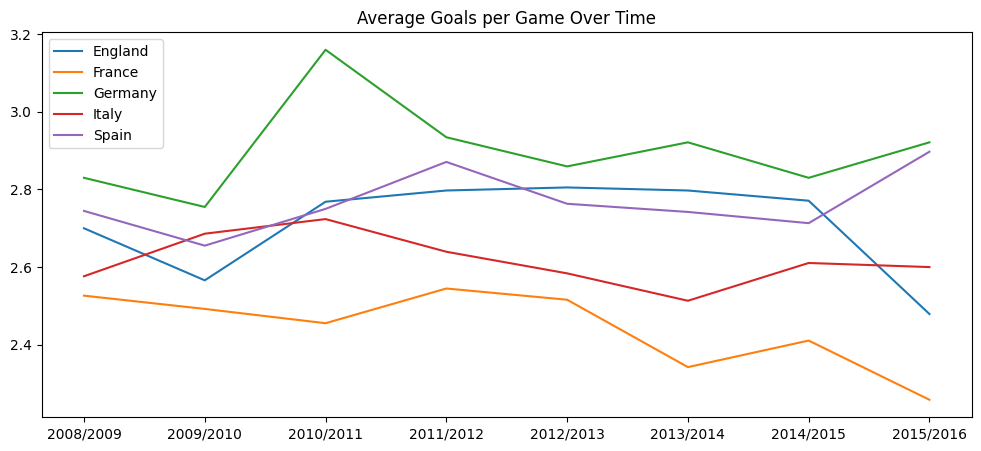

In [21]:
df = pd.DataFrame(index=np.sort(leages_by_season['season'].unique()), columns=leages_by_season['country_name'].unique())
df.loc[:,'Germany'] = list(leages_by_season.loc[leages_by_season['country_name']=='Germany','avg_goals'])
df.loc[:,'Spain']   = list(leages_by_season.loc[leages_by_season['country_name']=='Spain','avg_goals'])
df.loc[:,'France']   = list(leages_by_season.loc[leages_by_season['country_name']=='France','avg_goals'])
df.loc[:,'Italy']   = list(leages_by_season.loc[leages_by_season['country_name']=='Italy','avg_goals'])
df.loc[:,'England']   = list(leages_by_season.loc[leages_by_season['country_name']=='England','avg_goals'])
print(df.tail())

df.plot(figsize=(12,5),title='Average Goals per Game Over Time')